In [79]:
import pandas as pd
import numpy as np
import json
import csv
import os
import scipy.sparse as spp
from sklearn.metrics import mean_squared_error

from surprise import SVD
from surprise import Dataset
from surprise import Reader
%matplotlib inline

In [2]:
dev_tups = []

with open('reviews.dev.json', 'r') as g:
    for line in g:
        x = json.loads(line)
        dev_tups.append((x['reviewerID'], x['asin'], x['overall']))

In [3]:
test_tups = []

with open('reviews.test.unlabeled.csv', 'r') as h:
    next(h, None)
    for line in h:
        x = line.split(',')
        test_tups.append((x[0].strip(), x[1].strip(), x[2].strip()))

In [4]:
reader = Reader(line_format='user item rating', sep=',', skip_lines=1, rating_scale=(1, 5))
data = Dataset.load_from_file(file_path='reviews.training.csv', reader=reader)

In [5]:
trainset = data.build_full_trainset()

#### Surprise implementation of SVD

In [11]:
algo = SVD(random_state =0)
algo.fit(trainset)

In [30]:
algo.predict('A82LIVYSX6WZ9', 'B00001U0DM')

Prediction(uid='A82LIVYSX6WZ9', iid='B00001U0DM', r_ui=None, est=2.8384315916129963, details={'was_impossible': False})

In [13]:
for x in dev_tups[500:1000]:
    print(x, algo.predict(x[0], x[1]).est)

('A15NAWEF0EQJEK', '630021463X', 4.0) 4.143396734175487
('A1S3IEVZI29T7H', 'B004EPYZO4', 3.0) 4.1329619581967005
('A2ZDY6WY3MDJVZ', 'B00006C7G9', 5.0) 4.9643560002888
('A2A6NH6DPE0VXR', 'B001JNNDC4', 3.0) 2.9345748693199947
('A1MU3YFP28S9R4', 'B000I2JCAY', 5.0) 4.698368779377421
('A1IUYW55Q1RJ27', '6300270408', 4.0) 4.462363335566601
('A3QPCIHZKO285Z', 'B000KLQUV2', 5.0) 4.2410849716774495
('A1WX42M589VAMQ', 'B000X843UC', 5.0) 4.535517643651374
('A1WGR2ZO77RZNP', 'B0017INRGI', 5.0) 4.803226101412634
('A33TRLXYRS59Z8', 'B000GEIRAU', 5.0) 4.596753130302512
('A84Z6XUMGRMJ1', '0790740060', 3.0) 3.877231441566677
('A2FV4YTA0NLJ8S', '6301357264', 5.0) 4.042128909393943
('A11EQ2TAGTPQDB', '6304872402', 5.0) 4.459402368249408
('A1I4SFB4IFG1H9', 'B001TKNWVE', 4.0) 4.324718132220014
('A329U9CDUPKXAC', 'B000KX0HH8', 1.0) 3.250755113511675
('A7H5R4AIXYVRX', 'B0010YSD7M', 5.0) 4.56739375002203
('A2XMBWQL0LGNJD', '6300214346', 3.0) 3.7289763014922555
('A2B6TQR0PV97KY', 'B00005JCKU', 5.0) 4.248055283

In [32]:
np.sqrt(mean_squared_error([x[2] for x in dev_tups], [algo.predict(x[0], x[1]).est for x in dev_tups]))

1.0226088367248851

In [14]:
for x in test_tups[:500]:
    print(x, algo.predict(x[1], x[2]).est)

('85288b7fd23d48dcb4fd2c9b52a7fa3c', 'AT79BAVA063DG', 'B0009UVCQC') 3.924069623473602
('06f33eaec5bb4c20857cc1f9aee60fb4', 'A2DAHERP7HYJGO', 'B002ZG99TA') 3.6989498534437044
('8f14a0d25996472d80a2e745b66f565a', 'A3NM0RAYSL6PA8', 'B0001NBNDY') 2.5413993207214296
('50095c59950e444eb2b35afb00009f44', 'A2KODQS5LJGHF8', '6304089767') 5
('abbbd3cd87d846b0a965ae7ce0ea1aaf', 'A2ULE2TYILL4BR', 'B000056MOF') 3.590777913115558
('7ed61e842962473d91ee67b299d6fa9c', 'APJ9OZ0TTUXM9', '790752387') 4.037430805733917
('c9fc9eb2b3bc43229b08e93dd06ac5bc', 'A3L6XHA5FVMN16', 'B00CWM58WY') 4.6657723509650975
('bc11789349314da4a86021e38481aa28', 'A3K59HHMXRCYUW', 'B003F3NDWG') 4.62777008418513
('2fd34bf17c6141afbd82d6df7d6f5e6f', 'A3GNPEBKL5OOH5', 'B0000VCZK2') 4.827128154293002
('993bf1499b964d7f97338953e017f937', 'A27MPCHUY7IQA0', 'B002ZG971U') 2.614453570530508
('45c316bc81784997bcea7308c036e437', 'AS28JSVWLAN9J', 'B008YAPPXK') 4.500698497466124
('3ca8ff2dcdb14606b56f821c331e86b3', 'A1VP9TBSMVLMB8', '63018

('98d29a3906214c609307820cff6325ee', 'A1VMCMYWVQ6YBG', 'B00005JN55') 3.6515969564996116
('1245287bc5ec4196a02fd779494d1c4f', 'AF7X911US2MRA', 'B0034G4OVS') 3.6058452385804856
('844d693b319941f08da7b601f70aca10', 'A2SHWIOE8TVWJ2', 'B000K7UHF6') 4.094777439661256
('095721170f3f474c86191b2a495bd961', 'A3JZOITOIP90EW', 'B005OK722U') 3.142562638029604
('223f4d34c20b4801a10158dcb6cbf524', 'A36J45TZNN8VJ3', '6302481716') 4.442887644075161
('9a3a5006a9c343b7a985501cd6dae5a7', 'A29U8ALME3BB2', '6302206294') 3.774336957703982
('edc5717bd2d14365a438815347102828', 'A2XSMM89SI8P6Y', 'B0000EMYAY') 4.363489575145638
('ff8dc87085f44431b4eaccc28c228929', 'A3KEZLJ59C1JVH', 'B003L77GS8') 4.482865874645585
('9a707aba4f0c4f6ea2f354eccf628a0d', 'A2277ITC8732QQ', 'B000088NQR') 4.254120397666972
('eacc3dc4960047529710fb7783b95931', 'ADZBXR89ERXSX', 'B00008T79O') 4.243858665376108
('c168672d77fa41f586942f3b8b6c1bc3', 'A3OBBWCDNIYT8D', '6300247171') 4.476064145032975
('6711bd0d85614423aa5406f1c604228a', 'A2HWEZ

In [15]:
with open('submit_surp_SVD_rs.csv', 'w', newline='') as g:
    csvw = csv.writer(g, delimiter=',')
    csvw.writerow(['datapointID','overall'])
    for x in test_tups:
        predictions = algo.predict(x[1], x[2]).est
        csvw.writerow([x[0], predictions])

#### Parameter GridSearch

In [19]:
from surprise.model_selection import GridSearchCV

In [20]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.001, 0.010],
              'reg_all': [0.3, 0.7]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

In [21]:
gs.fit(data)

In [22]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.022632643872325
{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.3}


In [23]:
algo2 = gs.best_estimator['rmse']
algo2.fit(data.build_full_trainset())

In [43]:
np.sqrt(mean_squared_error([x[2] for x in dev_tups], [algo2.predict(x[0], x[1]).est for x in dev_tups]))

1.014853856623168

In [25]:
with open('submit_surp_SVD_withCV2.csv', 'w', newline='') as g:
    csvw = csv.writer(g, delimiter=',')
    csvw.writerow(['datapointID','overall'])
    for x in test_tups:
        predictions = algo2.predict(x[1], x[2]).est
        csvw.writerow([x[0], predictions])

#### Surprise implementation of non-negative matrix factorization

In [26]:
from surprise import NMF

In [27]:
algo3 = NMF()
algo3.fit(trainset)

In [28]:
for x in dev_tups[500:1000]:
    print(x, algo3.predict(x[0], x[1]).est)

('A15NAWEF0EQJEK', '630021463X', 4.0) 3.9769145518522944
('A1S3IEVZI29T7H', 'B004EPYZO4', 3.0) 4.134438646791332
('A2ZDY6WY3MDJVZ', 'B00006C7G9', 5.0) 4.753214909261049
('A2A6NH6DPE0VXR', 'B001JNNDC4', 3.0) 3.2535881490211005
('A1MU3YFP28S9R4', 'B000I2JCAY', 5.0) 5
('A1IUYW55Q1RJ27', '6300270408', 4.0) 3.983197816020481
('A3QPCIHZKO285Z', 'B000KLQUV2', 5.0) 3.924482449780898
('A1WX42M589VAMQ', 'B000X843UC', 5.0) 3.770714496832353
('A1WGR2ZO77RZNP', 'B0017INRGI', 5.0) 4.79423924967777
('A33TRLXYRS59Z8', 'B000GEIRAU', 5.0) 4.364284762133398
('A84Z6XUMGRMJ1', '0790740060', 3.0) 3.6729897039790433
('A2FV4YTA0NLJ8S', '6301357264', 5.0) 4.8275754140070415
('A11EQ2TAGTPQDB', '6304872402', 5.0) 4.165610589437064
('A1I4SFB4IFG1H9', 'B001TKNWVE', 4.0) 3.965029732113174
('A329U9CDUPKXAC', 'B000KX0HH8', 1.0) 3.2971188825634474
('A7H5R4AIXYVRX', 'B0010YSD7M', 5.0) 4.8099654317006895
('A2XMBWQL0LGNJD', '6300214346', 3.0) 3.5161929915500743
('A2B6TQR0PV97KY', 'B00005JCKU', 5.0) 4.410401583904136
('AR

In [34]:
np.sqrt(mean_squared_error([x[2] for x in dev_tups], [algo3.predict(x[0], x[1]).est for x in dev_tups]))

1.1096543237960828

In [29]:
with open('submit_surp_NNMF.csv', 'w', newline='') as g:
    csvw = csv.writer(g, delimiter=',')
    csvw.writerow(['datapointID','overall'])
    for x in test_tups:
        predictions = algo.predict(x[1], x[2]).est
        csvw.writerow([x[0], predictions])

#### Evaluations

In [39]:
dev_eval = []
for x in dev_tups:
    if abs(algo2.predict(x[0], x[1]).est-x[2]) > 1:
        dev_eval.append([*x, algo2.predict(x[0], x[1]).est])

In [50]:
np.random.seed(88)
randsel = [np.random.randint(0, len(dev_eval)-1) for x in range(5)]
randsel

[39200, 36815, 2481, 24938, 42558]

In [49]:
for x in randsel:
    print(dev_eval[x])

['AV6QDP8Q0ONK4', 'B007IUEDYY', 2.0, 3.200155031897258]
['A3BQCZNB97XUNY', 'B000063EME', 5.0, 3.9481990203442754]
['A3EBHHCZO6V2A4', 'B003BWQEMM', 5.0, 3.665763328120574]
['A2RMG94SRG1SD9', '6301661761', 3.0, 4.264854556364657]
['A27BY97QQS36V3', '0767814908', 1.0, 3.0981715524702547]


In [51]:
algo2.default_prediction()

4.110994929404886

In [66]:
user_eval ={}
for x in ['AV6QDP8Q0ONK4','A3BQCZNB97XUNY','A3EBHHCZO6V2A4','A2RMG94SRG1SD9','A27BY97QQS36V3']:
    uev = []
    with open('reviews.training.json', 'r') as f:
        for line in f:
            load = json.loads(line)
            if load['reviewerID'] == x:
                uev.append(load['overall'])
    user_eval[x] = (np.mean(uev), np.median(uev), uev)

In [67]:
item_eval = {}
for x in ['B007IUEDYY', 'B000063EME', 'B003BWQEMM', '6301661761', '0767814908']:
    uev = []
    with open('reviews.training.json', 'r') as f:
        for line in f:
            load = json.loads(line)
            if load['asin'] == x:
                uev.append(load['overall'])
    item_eval[x] = (np.mean(uev), np.median(uev), uev)

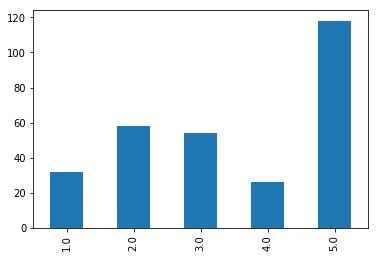

In [124]:
pd.Series(user_eval['A3EBHHCZO6V2A4'][2]).value_counts().sort_index().plot(kind='bar')

In [123]:
pd.Series(user_eval['A3EBHHCZO6V2A4'][0])

0    3.486111
dtype: float64

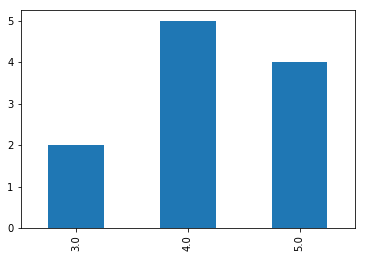

In [125]:
pd.Series(item_eval['B003BWQEMM'][2]).value_counts().sort_index().plot(kind='bar')

In [109]:
from collections import Counter

count= Counter()

with open('reviews.training.json', 'r') as f:
        for line in f:
            load = json.loads(line)
            count.update([load['reviewerID']])

In [112]:
count.most_common(10)

[('A16CZRQL23NOIW', 1879),
 ('A3LZGLA88K0LA0', 1877),
 ('A328S9RN3U5M68', 1844),
 ('ANCOMAI0I7LVG', 1840),
 ('ABO2ZI2Y5DQ9T', 1802),
 ('A2EDZH51XHFA9B', 1770),
 ('A2NJO6YE954DBH', 1582),
 ('AIMR915K4YCN', 1546),
 ('AV6QDP8Q0ONK4', 1509),
 ('A20EEWWSFMZ1PN', 1380)]